In [2]:
import networkx as nx
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pylab
from collections import Counter


In [3]:
def load_data(file_name):
    
    df = pd.read_csv(file_name)
    #data=df.drop_duplicates(subset ="id", keep = False, inplace = True) 

    return df["retweet_screen_name"], df["user_screen_name"]

def load_graph(file_name):
    df = pd.read_csv(file_name)
    

    return df["_irajput"], df["wantedshubham"]

def write_predictions(file_name, pred):
    df = pd.DataFrame(zip(range(len(pred)), pred))
    df.columns = ["id", "username"]
    df.to_csv(file_name, index=False)



1977
50715
3125
23282
568
222


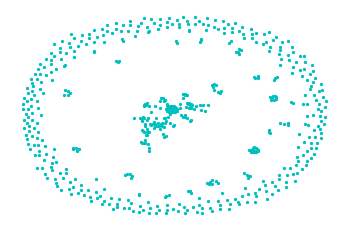

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221,

In [6]:
# modify the filename when pre-processing different dataset
df1_file = "beefban.csv"
namelist1, namelist2 = load_data(df1_file)


df2_file = "retweet_graph_beefban.csv"
Gnamelist1, Gnamelist2 = load_graph(df2_file)
print(len(Gnamelist1))

Gnamelist1=Gnamelist1.tolist()
Gnamelist2=Gnamelist2.tolist()
namelist1=namelist1.tolist()
namelist2=namelist2.tolist()


print(len(namelist1))
namelist1=list(dict.fromkeys(namelist1))
namelist2=list(dict.fromkeys(namelist2))
print(len(namelist1))
print(len(namelist2))

G=nx.Graph()

for i in range(len(Gnamelist1)):
    if (G.has_edge(Gnamelist1[i],Gnamelist2[i])):
        continue
    else :
        G.add_edge(Gnamelist1[i],Gnamelist2[i])


remove_list=[]
for name1 in G.nodes():
    if (name1 in namelist1)or (name1 in namelist2):
        continue
    else:
        remove_list.append(name1)

G.remove_nodes_from(remove_list)
print(len(G.nodes()) )
print(len(G.edges()))

pos=nx.spring_layout(G)
pylab.figure(2)
# specifiy edge labels explicitly

nx.draw_networkx_nodes(G,pos,
                       
                       node_color='c',
                       node_size=5)


# edges
#edge_labels=dict([((u,v,),d['weight'])
             #for u,v,d in G.edges(data=True)])
#nx.draw_networkx_edge_labels(G,pos,edge_labels=edge_labels)




plt.axis('off')
plt.savefig("beefban.png") # save as png
plt.show() # display

#print(G.nodes())
dicts=dict()
G=nx.relabel.convert_node_labels_to_integers(G)

for node in G.nodes():
    
    print([n for n in G.neighbors(node) ])
    n_list=[n for n in G.neighbors(node) ]
    dicts[node] = n_list



In [19]:
import pickle
# write the dict object to a pickle file and we can use it later when training the GNN model
a_file = open("adj_dict.pkl", "wb")
pickle.dump(dicts, a_file)
a_file.close()

In [ ]:
#self-label stands of users
# I labeled first 45 users' stands (the portion should be 1:2 )
stands=[1,-1,-1,1,1,1,1,-1,-1,-1,-1,-1,-1,-1,-1,1,1,1,1,1,1,1,1,1,-1,1,-1,1,1,1,1,-1,-1,-1,1,1,1,1,1,1,1,1,1,1,1]
print(len(stands))
# assign them to different groups based on their stands
pros=[]
cons=[]
for i in range(len(stands)):
    if stands[i]>0:
        pros.append(i)
    else :
        cons.append(i)
print(pros,cons)

In [6]:
import numpy as np
import os
from random import shuffle
import nltk
from nltk import word_tokenize
import re
import urllib.request
import zipfile
import lxml.etree

#get date
df1_file = "beefban.csv"
#namelist1, user_list = load_data(df1_file)
#user_list is the user that still in the retweet-graph
user_list = G.nodes()
data = pd.read_csv("beefban.csv")
vocab=list()
i=0
text_for_user=list()
tt =''
pro = []
con = []
#get the words of each user
for user in user_list:

    text=list()
    for x in range(len(data)):
        if (data.loc[x,"user_screen_name"]==user):
            text.append(data.loc[x,'text'])
   

    sentences_ted=[]
    texts=''
    for input_text in text:
        input_text=re.sub(r'http\S+', '', input_text)
        input_text=re.sub(r'@\S+', '', input_text)
        input_text=re.sub(r'RT', '', input_text)
        input_text_noparens = re.sub(r'\([^)]*\)', '', input_text)
        #print(input_text_noparens)
        # store as list of sentences
        sentences_strings_ted = []
        for line in input_text_noparens.split('\n'):
            m = re.match(r'^(?:(?P<precolon>[^:]{,20}):)?(?P<postcolon>.*)$', line)
            sentences_strings_ted.extend(sent for sent in m.groupdict()['postcolon'].split('.') if sent)
        #print(sentences_strings_ted)
        # store as list of lists of words
        for sent_str in sentences_strings_ted:
            tokens = re.sub(r"[^a-z0-9]+", " ", sent_str.lower()).split()
            sentences_ted+=tokens
            
    #texts us the words of the user
    texts=' '.join(list(sentences_ted))
    print(texts)
    
    #tt is the combination of all users word  
    tt=tt+texts+'\n'
   


    # get the words of users that already be labeled.
    if (i in pros):
        pro.append(texts)
    if (i in cons):
        con.append(texts)
    i=i+1



print(len(vocab))
print(len(user_list))

0 wantedshubham
raping also got communal angle now secularism is at stake after death also beefban evn if u r animal lover nd veggie why only agn beefban why not agn all meat of animls nt serving d purpose bollywoodashames constitusn doesnt allow killing of animals unlike sharia which allows butchering of humans also beefban bollywoodashames i born in muslim family and i support beefban because i respect my hindu brother s sentiment jay gaw mata denizens of scularsm r advcatng beefban hr of scular violtd wht abt animal r bollywoodashames 1 n yes i just said secularism is at stake nw dubai ppl wl produce my films beefban bollywoodashames that will save thousands of secular halal meat shop owners beefban we bolly ppl r with banpork prog coz we r seculars beefban is communal bollywoodashames okay beti bachao beti padhao yojana if it was happening all these years modi govt responsible beefban bollywoodashames we r animal lovers nd seculars as well thats y we r agn beefban nd hurt hindus bo

In [40]:
pros=''
cons=''

for i in range(15):
    pros=pros+pro[2*i]+'\n'
    cons=cons+pro[2*i+1]+'\n'
    cons=cons+con[i]+'\n'
# construct training file that used to train the LSTM model  
#the size of docs should be double as queries
#there is a matching between queries and docs
# ith sentence in queries should match with 2*i-1 th and 2*i sentence in docs, while 2*i-1 th sentence is same stands with it, 2*i is opposite stands with it.
with open(os.path.join('./', 'queries.txt'), 'w') as f:
        f.writelines(pros)
with open(os.path.join('./', 'docs.txt'), 'w') as f:
        f.writelines(cons)
# construct the words file that used to feed LSTM model and get the word vector
with open(os.path.join('./', 'words_for_vec.txt'), 'w') as f:
        f.writelines(tt)